In [1]:
import tensorflow as tf
print ('Tensorflow version is', tf.__version__)

c:\anaconda\pkgs\python-3.6.3-h9e2ca53_1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow version is 1.4.0


## create dataset

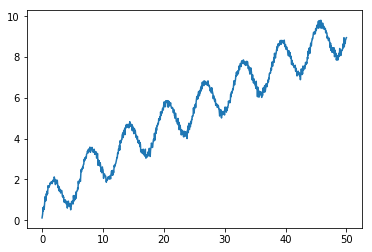

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_size = 1000
x = np.linspace(0, 50, data_size).astype(np.float32)
noise = np.random.normal(loc = 0, scale = 0.1, size = (data_size))

y = np.sin(x) + 0.6*x**0.5 + x/10 + noise
y = y.astype(np.float32)

%matplotlib inline
plt.plot(x, y)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

## build deep learning prediction interval

In [5]:
import tensorflow as tf

batch_size = 1

## define the neural network
X = tf.placeholder(tf.float32, shape=(1, batch_size))
Y = tf.placeholder(tf.float32, shape=(1, batch_size))

# Network Parameters
n_hidden_1 = 20 # 1st layer number of neurons
n_hidden_2 = 20 # 2nd layer number of neurons
n_hidden_3 = 20

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.truncated_normal([batch_size, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_3, 1]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'out': tf.Variable(tf.truncated_normal([1]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 20 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Hidden fully connected layer with 20 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    # Output fully connected layer with a neuron
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer

## define loss function
y_model = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.square(y_model - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss_op)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
loss_trace = []
y_pred = np.zeros(shape = (len(x_test)))
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(500):
        
        total_loss = 0
        num_batch = int(len(y_train)/batch_size)
        
        for (x, y) in zip(x_train, y_train):
            # Run optimization op (backprop)
            #rand_ind = np.random.randint(len(x_train), size = batch_size)
            #batch_x, batch_y = x_train[rand_ind], y_train[rand_ind]
            _, loss = sess.run([train_op, loss_op], feed_dict={X: np.reshape(x, (-1, batch_size)), 
                                                               Y: np.reshape(y, (-1, batch_size))})
            total_loss += loss
            
        loss_trace.append(total_loss)
        print("Optimization Finished!", total_loss)
    
    for i in range(len(x_test)):
        y_pred[i] = sess.run(y_model, feed_dict = {X: np.reshape(x_test[i], (-1, batch_size))})

Optimization Finished! 19577.85943377256
Optimization Finished! 59725.61659007376
Optimization Finished! 2542.2071404173403
Optimization Finished! 100769.67504554667
Optimization Finished! 1702.5456326941458
Optimization Finished! 13253.25458730126
Optimization Finished! 68297.44939497483
Optimization Finished! 2070.7014675817945
Optimization Finished! 31120.06167430262
Optimization Finished! 9785.030946325422
Optimization Finished! 64529.94970181263
Optimization Finished! 1953.2615674271765
Optimization Finished! 21020.458819723113
Optimization Finished! 17140.863853799634
Optimization Finished! 21476.692866277113
Optimization Finished! 13066.281041812526
Optimization Finished! 27963.89056808619
Optimization Finished! 3477.6568934819275
Optimization Finished! 56641.899440064095
Optimization Finished! 1626.5942406635907
Optimization Finished! 7354.566188301024
Optimization Finished! 40235.349856235836
Optimization Finished! 2040.155634530075
Optimization Finished! 14157.500407025862
Op

Optimization Finished! 389.1824977561001
Optimization Finished! 390.8587322782125
Optimization Finished! 388.484326719563
Optimization Finished! 384.45559238570604
Optimization Finished! 399.472515556645
Optimization Finished! 394.96281433538525
Optimization Finished! 389.6974574787221
Optimization Finished! 384.7830507822723
Optimization Finished! 395.9444638184396
Optimization Finished! 397.0612213526863
Optimization Finished! 395.4370279124153
Optimization Finished! 431.1760763002027
Optimization Finished! 386.20803609352805
Optimization Finished! 389.0984559803554
Optimization Finished! 390.84929139092264
Optimization Finished! 393.2612602686113
Optimization Finished! 391.54981369473944
Optimization Finished! 390.9181552708465
Optimization Finished! 392.38552858462873
Optimization Finished! 392.050160216852
Optimization Finished! 391.1828582193141
Optimization Finished! 399.62538087665985
Optimization Finished! 389.9529072900125
Optimization Finished! 397.8326610110238
Optimization

Optimization Finished! 330.0844473872771
Optimization Finished! 329.9873170042665
Optimization Finished! 331.2795010563659
Optimization Finished! 328.9420666709642
Optimization Finished! 328.8246220984347
Optimization Finished! 326.6003057215418
Optimization Finished! 326.1970410509781
Optimization Finished! 325.78752375381555
Optimization Finished! 324.3387143721966
Optimization Finished! 323.6532599951961
Optimization Finished! 324.48794183153683
Optimization Finished! 323.09186907269896
Optimization Finished! 321.74504711648547
Optimization Finished! 322.23755038172226
Optimization Finished! 321.611893313682
Optimization Finished! 323.0456224781968
Optimization Finished! 320.66250669863643
Optimization Finished! 320.48788660538617
Optimization Finished! 321.3908946158833
Optimization Finished! 321.3077663420538
Optimization Finished! 321.08527925222984
Optimization Finished! 320.9408745809653
Optimization Finished! 319.1713569205539
Optimization Finished! 319.1092569830344
Optimizat

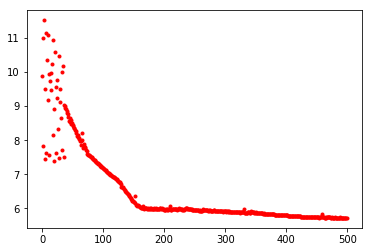

In [6]:
plt.plot(np.log(loss_trace), 'r.')

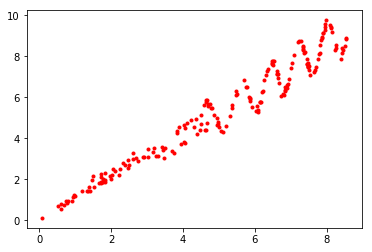

In [7]:
plt.plot(y_pred, y_test, 'r.')